# $S_n$-Equivariant Convolutional Quantum Alternating Algorithms

In this tutorial we explain the $S_n$-Equivariant Convolutional Quantum Alternating ($S_n$-CQA) Algorithms proposed in https://arxiv.org/abs/2112.07611, where we illustrate its practical significance in approximating the ground state of the frustrated anti-ferromagnetic Heisenberg Hamiltonian on various 2D lattices. 

## Contents
1. [Introduction](#introduction)
2. [$S_n$-CQA Algorithms](#cqatheory)
    1. [Symmetries in Quantum Computing](#symmetry)
    2. [Significance in Machine Learning](#ml)
    3. [Description of the $Sn$-CQA](#cqadescription)
    4. [Adiabatic Description at $p \rightarrow \infty$](#adiabetic)
3. [Implementation](#implementation)
    1. [$J_1$-$J_2$ Heisenberg Hamiltonian ](#square)
    2. [CQA Ansatze](#kagome)
4. [References](#references)

## Introduction <a id='introduction'></a>

A key question in quantum algorithms is to identify the possible source for a quantum speedup --ideally we are looking for a typical class of problems that allow an exponential speedup in the quantum computers versus that in a classical device. As running on a quantum device might be diffulct to access and expansive to run, an exponenetial speed-up seems to be the few likely motivations for us to try on quantum computers! 

As C.N.Yang once said: “symmetry dictates interaction.” Symmetry pops up everywhere, from standard model of particle physics, rotating and charged black holes, covariant quantum error correcting codes, Heisenberg model in condensed matter physics, classical description moleuclar force fields, graph ismorphism problems, the list goes on and on. 

A natural possible source of the quantum advantage comes from studying inherent symmetry of problems. In physics, symmetry imposes constraints with respect to the problems we are solving, and such contraints normally involve in calculating certain cofficients using group representation theory. Often these coefficients are believed not to be computed in polynomial time. Similarly in the rapid evolving fields of machine learning, learning with symmetry or more generally equivariance has emerged as the dominant paradigm in learning molecular graphs, force fields, and protein strcutures. 

As proposed in https://arxiv.org/abs/2112.07611, the authors studied how we can possibly leverage the use of quantum computers to speed up the calculation of these certain representation-theoretical coefficients and how we can use these advantage to design novel quantum algorigthms to solve physical problem of interests that is classically hard. As a consequence the proposed $S_n$-Equivariant Convolutional Quantum Alternating ($S_n$-CQA) Algorithms is developed to answer these questions and we will show its effectiveness in solving a physically hard problem$--$ground states of the frustrated magnets! 

## 2. $S_n$-CQA Algorithms <a id='cqatheory'></a>

### A. Symmetries in Quantum Computing <a id='symmetry'></a>

In quantum computing there are two types of symmetries: continous symmetry on qubits and discrete symmetries. In qubits the continuous symmetries could be U($1$) or SU($2$) symmetry on each qubit, for instance:
$$
\exp(i\theta_0 X_0 ) \exp(i \theta_1 X_1) \exp(i \theta_2 X_2) | 000 \rangle
$$

while the discrete symmetries are simply permuting a set of qubits, such a the SWAP gate:
$$
\text{SWAP} | 01 \rangle = | 10 \rangle
$$
It seems that these two set of symmetries are not related to each other: how does a bit flip could possibly have something do with swapping qubits? Meretriciously, there is a deep connection between these two types of symmetries, called the Schur-Weyl duality. Loosly speaking the Schur-Weyl duality states: (a) SWAPS and Pauli rotations defined above commute with each other, so they can be block-diagnolized simultaneously, (b) Their block-diagonal structures can be organized into a bigger block, labelled by a a partition of n letters.  


A $\textbf{partition}, \lambda = (\lambda_1, ..., \lambda_d),$ of n letters or qubits, where $\sum^{d}_{i=1} \lambda_i = n$, is described by a corresponding $\textbf{Young diagram}$:

In quantum computing each partition $\lambda$ restricts to Hilbert space $ \mathcal{H} = \mathbb{C}^{2^n} \times \mathbb{C}^{2^n}$ to a unique block consisted of SU($2$) and $S_n$ actions. 

The framework of global SU($d$)-symmetry is first proposed by Jordan (2009) in his seminal paper "Permutational Quantum Computing" (PQC) where a possible source of quantum advantage is formulated by being able to matrix elements of elements in the symmetric group $S_n$, for instance SWAP(1,5), swapping first and fifth qubit. These matrix elements lives thse blocks labelled by partition $\lambda$ and are thought to be classically hard aka take exponenetial time to compute. Howeber, PQC offers a polynomial time algorithm to approximate these matrix elements. This sounds really neat; is this an end of story? 

It turns out there nevertheless exists polynomial time classical algorithm to compute these matrix elements on qubits. A natural question raised is how can generalize PQC further to restore hope in quantum advantage? Also, along this pursuit, can we identify useful problems to solve? 





### B. Significance in Machine Learning <a id='ml'></a>

Let's say if we wish to predict properties of a moulecular system. The first-principle approach based on the density functional approximation requires far too large computational resources in a moderately-sized molecular system so it is quite common to use neural networks to approximate its quantum effects. Suppose we wish to predict the ground state energy $E_0$ or the first-excited state energy $E_1$. We know these quantities are invariant under global rotation SO($3$). It does not make sense if what the neural network learned does not respect this SO($3$) symmetry. 

Furthermore, molecules are naturally representated by the molecular graphs. So an other necessary contraint is our neural network model is $\textit{equivariant}$ to the permutation on vertex labels in graphs. Roughly speaking this means that our neural network should be smart enough to recoginze two molecular graphs to be the same if they only differ from relabelling of vertices. 

What we have described is the so-called equivariant graph neural networks, a leading neural network in learning molecular graphs and other graphical models. To dig into the math, the natural mathematical concept is the so-called equivariant convolution.

Let $f_{1}, f_{2} \in \mathbb{C}\left[G\right]$. Their convolution is defined as
$$
\left(f_{1} * f_{2}\right)(\sigma):=\sum_{\tau \in G} f_{1}(\tau) f_{2}\left(\tau^{-1} \sigma\right),
$$
Mathematically the equivariance with respect to a group $G$ takes the meaning that acting $G$ on $f_1$ and then convolve with $f_2$ equals to convolve first and act by $G$ on the resultant $f_1 * f_2$: 
$$
\Big(L_{\eta}\left(f_{1} * f_{2}\right) \Big) (\sigma) = \left(f_{1} * f_{2}\right)(\eta^{-1} \sigma) = \Big(L_{\eta}\left(f_{1}\right) * f_{2} \Big) (\sigma)
$$
This convolution products over functions seems to be irrelevant to our discussion over quantum circuits--at the end of day, we write matrices (gates) and vectors (states)! It turns out, if you are smart as Fourier, these functions $f_1, f_2$ can be represented by matrices by the Fourier transform: 
$$
H:=\pi(f) = \sum c_i \pi(\sigma_i).
$$
Where $\pi(\sigma_i)$ is the matrix corresponding to the group element on quantum circuits. Say $\sigma_i $ permutes $1$ and $2$, then $\pi(\sigma_i) = \text{SWAP}(1,2)$ and $c_i$ is some complex coefficients. Then we get a $\pi(f)$ as a quite complicated gates on our quatum circuits with its decomposition rule given by these summation of $\pi(\sigma_i)$. Let's assume $\pi(f)$ to be Hermitian, so we just denote it by $H$ some Hamiltonian. 

### C. Description of the $S_n$-CQA Algorithm 
The $S_n$-equivariant Convolutional Quantum Alternating ($S_n$-CQA) algorithm can be best understood as an analog to the QAOA in the prescence of global SU($d$) symmetry. Simiarly $S_n$-CQA takes a problem Haniltonian $H$ for which we aim to approxiate its ground state and a mixing hamiltonian $H_M$ whose eigenstates are easy to define. Then $S_n$-CQA is taken from the following families of SU(d)-symmetric unitaries: 

\begin{align}
\operatorname{CQA}^{(p)}:= \left\{ \exp(i\sum_{k \geq l }\beta^{(p)}_{kl}X_k X_l) \exp(i \theta^{(p)}H) \cdots \exp(i\sum_{k \geq l }\beta^{(1)}_{kl}X_k X_l) \exp(i \theta^{(1)}H) \right\}
\end{align}

Where $\beta^{(i)}_{kl}, \theta^{(i)}$ are chosen randomly for all $1 \leq i \leq p$. The hyperparameter $p$ controls the number of alternating layers (depth) of the quantum circuits. $X_k$ is denoted as the Young-Jucy-Murphy (YJM) elements: 
$$
X_k = \text{SWAP}(1, k) + \text{SWAP}(2, k) + \cdots + \text{SWAP}(k-1, k) 
$$
The YJM elements enjoy very special properties in the representation of the symmetric group due to the Oknoukov-Vershik approach. We encourage interested and mathematically-motivated readers to take a look at this beautiful theory. 

Below are some remarkable properties enjoyed by $S_n$-CQA algorithms

#### (1) Exponential Quantum Speedup
Remarkably, it is shown in the paper that the alternating pair $\exp(i\sum_{k \geq l }\beta_{kl}X_k X_l) \exp(i \theta H)$ whose matrix element can be evaulated in quantum circuits in polynomial time, whereas it remains a classicaly hard problem requiring $S_n$-FFT, taking at least $O(n! n^2)$. 

In general, we can extend PQC by considering the task in approximating matrix element of Hamiltonian simulation of $k$-local SU(d)-symmetric Hamiltonian. This way, we get a generic quantum super-exponential speedup! 
#### (2) $S_n$-CQA are dense! 
If our problem hamiltonian $H$ to be path-connected on the each $S_n$ irrep block; that is: $\forall i, j \in [d], \exists r $ such that $[H^r]_{ij} \neq 0$. Then $\lim_{p \rightarrow \infty} \operatorname{CQA}^{(p)}$ is dense at every $S_n$ irreps. 

To gain some perspective in understanding these theoretical results, let's consider the task approximating ground state of a frustated magnet: in the case of the antiferromagnetic $J_1$-$J_2$ spin $1/2$ hamiltonian, we have the Hamiltonian: 
\begin{align}
H = J_1 \sum_{\langle i, j \rangle } \vec{S}_i \cdot \vec{S}_j + J_2 \sum_{\langle \langle i, j \rangle \rangle } \vec{S}_i \cdot \vec{S}_j 
\end{align}

Where the first termn sums through all nearest pair and the second term through all second-nearest pairs. When $J_1$ and $J_2$ are non-zero, then we say that the system is frustrated. While frustaed system might lead to many physically significant phenemon such as a novel spin liquid phase, we still do not know how to characterize the ground state. The lack of analytical characterization of the ground states in frustration makes it an important problem to solve using heuristic method such as tensor networks and neural networks. 

Since the hamiltonian is SU(2)-symmetric, so is its ground state. How can we reinforce this global SU(2) symmetry in approximating the ground state of the frustrated magnets? Recall in the previous section of the Schur-Weyl duality, we know that approximating the ground state of frustrated Hamiltonian corresponds precisely to be able to approximate some matrix elements within the irrep blocks of $S_n$ labelled by the partition. As a result we conclude: 

<ul>
<li>Since our CQA is dense in every $S_n$ irrep, approxmating aribtary matrix element in an abitrary irrep block $S^\lambda$ is equivalent to approximate corresponding matrix element of some unitary in $\lim_{p \rightarrow \infty } \text{CQA}^{(p)}$.</li>
<li>We know as long as $p$ grows polynomially in the number of qubits the task above enjoys the super-exponenetial quantum speedup.</li>
</ul>

In $S_n$-CQA heuristic algorithms we set $p$ to be small, normally between $3-6$. In another words, $S_n$-CQA heuristic algorithms enjoy a rigorous quantum super-exponential speedup that otherwise classical counterparts cannot achieve. Of course, we will see in the next section the effectiveness of the $S_n$-CQA algorithm in approximating the ground states of the frustrated magnets. 










### D Adiabatic Description at $p \rightarrow \infty$  <a id='adiabetic'></a>


Similar to the limiting $p \rightarrow \infty $ behavior of QAOA, our ansatz corresponds to the adiabatic quantum evolution for each $S_n$ irreducible representation subspace. The standard interpolating Hamiltonian is given by: 
\begin{align}
\begin{aligned}
    \widehat{H}(s) &= s H_p + \sum_{k \leq \ell}(1-s) \beta_{k \ell}(s) X_k X_{\ell} 
    \\&= s H_p + (1-s) H_M(s),
\end{aligned}
\end{align}
where $s$ ranging from $0$ to $1$ is the time-parameterized path with $s(0) = 0$ and $s(T) = 1$. In contrast with the standard interpolating Hamiltonian, we set the coupling strength parameters $\{\beta_{k \ell}\}$ as path dependent I.I.D. random variables drawn from some possibly unknown distribution $\mathcal{D}$. Using the Central Limit Theorem, it suffices to draw $\{\beta_{k \ell}\}$ from normal distributions (when $n$ is large), say $\mathcal{N}(0, \sigma)$. We shall work in SU(2)-$S_n$ duality but generalization to qudits is straightforward. 

Choose an irrep subspace $S^\lambda$ with the instantaneous ground and first excited states $\ket{v_0(s)}, \ket{v_1(s)}$ and the spectral gap $\Delta = \operatorname{min}_{s \in [0,1]} E_1(s) - E_0(s)$. The adiabatic theorem implies that $\ket{v_0(s =T)}$ is $L^2$-$\epsilon$ close to the ground state of $H_p$ if: 
\begin{align}
&T \gg \frac{|\bra{v_1(s)}\partial_s \widehat{H}(s)\ket{v_0(s)} |}{\Delta^2},
\end{align}
where: 
\begin{align*}
     \partial_s \widehat{H}= {{H}_{p}}-\sum\limits_{k\le \ell }{{{\beta }_{k,\ell }}}(s){{X}_{k}}{{X}_{\ell }}-s\sum\limits_{k\le \ell }{{{\partial }_{s}}}{{\beta }_{k,\ell }}(s){{X}_{k}}{{X}_{\ell }}.
\end{align*}

The quantum evolution in the Heisenberg picture is: 
\begin{align*}
    U(T) = \mathcal{T}\operatorname{exp}(-i \int^T_0 dt \widehat{H}(s(t))).
\end{align*}
Taken $T = N \Delta t \equiv \Delta t_N$ where $s(\Delta t_j)$ is constant at this small time increments, the standard Trotterization technique implies that: 
\begin{align}
\begin{aligned}
    U(T) \approx \prod^N_{j=1}&\operatorname{exp}(-i\Delta t_j s(\Delta t_j)) \Pi^n_{k \leq \ell} \\
    &\operatorname{exp}(-i \Delta t_j (1 -s(\Delta t_j) )\beta_{k, \ell}(\Delta t_j) X_k X_{\ell}).
\end{aligned}
\end{align}
Setting $\gamma_j = \Delta t_j s(\Delta t_j)$ and $(\widetilde{\beta}_{_{k, \ell}})_j = \Delta t_j (1 -s(\Delta t_j) )\beta_{k, \ell}(\Delta t_j)$, we recover the $S_n$-CQA ans{\"a}tze at $p = N$. The variational parameters $\{(\widetilde{\beta}_{_{k, \ell}})_j\}_{k, \ell}$ for the classical optimization corresponds to the randomized coupling strength parameters for the initial Hamiltonian strictly diagonal in the total spin basis elements. 

## 3. Implementation <a id='implementation'></a>





Let's consider one typical lattice struccture for the frustrated $J_1$-$J_2$ magnets: kagome lattice,  consisted of $12$ spins



Let's code up the $S_n$-CQA using classical simulation. For starters, we will use JAX, Snob2, Pytorch, and Numpy. For numerical implementation, we decompose into the following steps: 

<ul>
<li> We specify the hamiltonian for which we wish to approximate its ground state and the YJM mixing Hamiltonians </li>
<li> We code one alternating pair of the time evolution of these two Hamiltonian with variational parameters on the Schur basis </li>
<li> We encode the $\text{CQA^{(p)}}$ for which subsequent gradient descent can be performed  </li>
</ul>


### A Encode Hamiltonians onto Schur Basis

Let's start with the how to encode the Heisenberg hamilonian in the 12-spin $3\times 4$-square lattice, for which we use the following elegant identity relating $\hat{S}_i \cdot \hat{S}_j$ and swapping $i$th and $j$th qubits: 

$$
\hat{S}_i \cdot \hat{S}_j = \frac{1}{2}(i\:\: j) - \frac{1}{4} I
$$

In [2]:
import jax 
import torch 
import jax.numpy as jnp 
import numpy as np 
import Snob2 
import cnine 
from scipy.linalg import eigh, eigvalsh


lattice =[[(1,2), (1,8), (2,3), (2,7), (3,4), (3,6), (4,5), (5,6), (5, 12),
            (6,7), (6, 11), (7, 10), (7, 8), (8,9), (9, 10), (10, 11), (11, 12)],

           [(1,3), (1,9), (1,7), (2,4), (2,8), (2, 10), (2, 6), (3, 11), (3,5), (3,7),
            (4, 12), (4, 6), (5, 7), (5, 11), (6, 8), (6, 10), (6, 12),  (7, 9), (7, 11), (8, 10),
            (9, 11), (10, 12)]]
partit = [int(6),int(6)] # the partition specifies which irrep we wish to go to
Nsites = int( 12) # number of spins we have 
J = [1, 0.5] # let's consider the frustrated case with J2 =0.5
group = Snob2.Sn(Nsites) # the symmteric group S6 
dim = Snob2.SnIrrep(partit).get_dim()
def Ham_rep(lattice, partit, J, dim):
    rep = Snob2.SnIrrep(partit) # the representation of S6 corresponding to the partition [6,6] 
    rep_mat0 = np.multiply(np.multiply(-1.0, len(lattice[0]) / 2, dtype='float64'),
                            np.diag(np.ones(dim)))
    for st in lattice[0]:
        rep_st = rep.transp(st[0], st[1]).torch().numpy()
        rep_mat0 = np.add(rep_mat0, rep_st)
    rep_mat0 = np.multiply(J[0] / 2, rep_mat0)
    if float(J[1]) == float(0):
        return rep_mat0
    else:
        rep_mat1 = np.multiply(np.multiply(-1.0, len(lattice[1]) / 2, dtype='float64'),
                                np.diag(np.ones(dim)))
        for st in lattice[1]:
            rep_st = rep.transp(st[0], st[1]).torch().numpy()
            #         print(rep_st)
            rep_mat1 = np.add(rep_mat1 ,rep_st)
        rep_mat1 = np.multiply(J[1] / 2, rep_mat1)
        rep_mat_H = np.add(rep_mat0, rep_mat1)

        return rep_mat_H
print(Ham_rep(lattice, partit, J, dim).shape)

Snob2 initialized.

(132, 132)


Let's now build up the YJM Hamiltonian: 
$$
H_M = \sum_{k \geq l} \beta_{k,l} X_k X_l 
$$
Where $\beta_{k, l}$ are the variational parameters. Let's code up these: 

In [3]:
def get_YJMs(dim, k, l):
        # compute X_k X_l for the YJM elements and by default X_1 = e
        rep = Snob2.SnIrrep(partit)
        Xkl= np.zeros((dim, dim))
        if k == l == 1:
            return np.diag(np.ones(dim))
        for i in range(1, max(k, l)):
            pi = rep.transp(i, max(k, l)).torch().numpy()
            if min(k, l) == 1:
                Xkl = np.add(Xkl, pi)
            else:
                for j in range(1, min(k, l)):
                    pj = rep.transp(j, min(k,l)).torch().numpy()
                    pij = np.matmul(pi, pj)
                    Xkl = np.add(Xkl, pij)
        return Xkl
YJMs_mat = np.zeros((Nsites, Nsites, dim))
for i in range(Nsites):
    if i == Nsites -1:
        YJM = get_YJMs(dim, i, i).astype('float64')
        YJMs_mat[i, i, :] = np.diag(YJM)
    for j in range(i, Nsites):
        YJM = get_YJMs(dim, i,j).astype('float64')
        YJMs_mat[i,j,:] = np.diag(YJM)
print(YJMs_mat.shape)


(12, 12, 132)


### B. Single Layer $S_n$-CQA 
Now Let's code up one single layer of the $S_n$-CQA. 
$$
\exp(i \sum_{k \geq l} \beta_{k, l} X_k X_l) \exp(i \theta H)
$$

In [4]:

from jax.scipy.linalg import expm
from jax import random

def YJM_Conv2d(YJMs_mat, YJMparams):
    # params for the YJM Hamiltonian ------ n(n+1)/2 params per layer of YJM
    YJMs =jnp.asarray(YJMs_mat) 
    if jnp.iscomplex(YJMparams) is False:
        print('the parameters are not complex valued ')
        raise ValueError
    YJM_conv = jnp.ones(dim)
    YJMparams = jnp.multiply(1j, YJMparams)
    for i in range(1, Nsites + 1):
        if i == Nsites:
            YJM_rep = YJMs.at[i,i,:].get()
            exp_YJM_rep = jnp.exp(jnp.multiply(YJMparams.at[int(i), int(i)].get(), YJM_rep))
            YJM_conv = jnp.multiply(YJM_conv, exp_YJM_rep)
        for j in range(i, Nsites + 1):
            YJM_rep = YJMs.at[i,j,:].get()
            exp_YJM_rep = jnp.exp(jnp.multiply(YJMparams.at[int(i), int(j)].get(), YJM_rep))
            YJM_conv = jnp.multiply(YJM_conv, exp_YJM_rep)
    YJM_conv =YJM_conv / jnp.linalg.norm(YJM_conv, ord= int(2))
    return jnp.diag(YJM_conv)

def Heis_Conv2d(Ham, Hparam):
    Ham = jnp.asarray(Ham.astype('float64')) 
    Hparam = jnp.multiply(Hparam, 1j)
    Heis_conv = expm(jnp.multiply(Hparam, Ham))
    Heis_conv = Heis_conv / jnp.linalg.norm(Heis_conv, ord=int(2))
    return Heis_conv






### C. $S_n$-CQA Ansatze in Schur Basis
Once we have one layer, we can simply stack up even more by introducing the control parameters $p$. 

In [5]:
def random_params(p: int, scale=float(1e-2)):
    YJMparams = jnp.zeros((Nsites, Nsites, p))
    Hparams = jnp.zeros((p))
    for i in range(p):
        w_key, b_key = random.split(random.PRNGKey(int(i)))
        YJMparams = YJMparams.at[:, :, i].set(jnp.multiply(scale, random.normal(w_key, (Nsites, Nsites))))
        Hparams = Hparams.at[i].set(jnp.multiply(scale, random.normal(b_key)))
    return YJMparams, Hparams

YJMparams, Hparams = random_params(3)
print(YJMparams.shape)
print(Hparams.shape)

def CSn_Ansazte(YJMs_mat, Ham, p,YJMparams, Hparams):
    # rep_mat_H = self.Ham_rep()
    ansatze = jnp.diag(jnp.ones(dim))
    for i in range(p):
        Heis_conv = Heis_Conv2d(Ham,Hparams.at[i].get())
        YJM_conv = YJM_Conv2d(YJMs_mat,YJMparams.at[:, :, i].get())
        ansatz = jnp.matmul(YJM_conv, Heis_conv)
        ansatze = jnp.matmul(ansatz, ansatze)
        ansatze = ansatze / jnp.linalg.norm(ansatze, ord=int(2))
    return ansatze

Ham = Ham_rep(lattice, partit, J, dim)
CQA_ansatze = CSn_Ansazte(YJMs_mat, Ham, 4, YJMparams, Hparams)
print(CQA_ansatze.shape)


(12, 12, 3)
(3,)
(132, 132)


## Qisikit Simulation 

In [1]:
import qiskit 
import numpy as np 
import matplotlib.pyplot as plt

from typing import Optional, Union, List, Callable, Tuple
from qiskit.circuit import QuantumCircuit, QuantumRegister, parameter
from qiskit import transpile
from qiskit.circuit.library.basis_change import QFT
from qiskit.quantum_info import SparsePauliOp, PauliList, Pauli
from qiskit.opflow import X, Y, Z, I, PauliTrotterEvolution
from qiskit.opflow import PauliOp, PauliSumOp
from qiskit_codes.cqa_compbasis import CQA
import networkx as nx


def getJ1J2_Ham(J: list, J1_edges: list, J2_edges:list, num_sites: int) -> PauliSumOp:
    xstring = np.zeros(num_sites)
    zstring = np.zeros(num_sites)
    J1_lst = []
    for J1pauli in J1_edges:  
        J1pauli_lst = []
        J1xstring = np.zeros(num_sites)
        J1xstring[J1pauli[0]] = 1
        J1xstring[J1pauli[1]] = 1 
        J1zstring = np.zeros(num_sites)
        J1zstring[J1pauli[0]] = 1
        J1zstring[J1pauli[1]] = 1 
        J1pauli_lst.append(Pauli(zstring, J1xstring))
        J1pauli_lst.append(Pauli(J1zstring, xstring))
        J1pauli_lst.append(Pauli(J1zstring, J1zstring))
        J1_lst.append(PauliSumOp(SparsePauliOp(J1pauli_lst, coeffs=np.array([J[0], J[0], J[0]]))))
    J2_lst = []
    for J2pauli in J2_edges:  
        J2pauli_lst = []
        J2xstring = np.zeros(num_sites)
        J2xstring[J2pauli[0]] = 1
        J2xstring[J2pauli[1]] = 1 
        J2zstring = np.zeros(num_sites)
        J2zstring[J2pauli[0]] = 1
        J2zstring[J2pauli[1]] = 1 
        J2pauli_lst.append(Pauli(zstring, J2xstring))
        J2pauli_lst.append(Pauli(J2zstring, xstring))
        J2pauli_lst.append(Pauli(J2zstring, J2zstring))
        J2_lst.append(PauliSumOp(SparsePauliOp(J2pauli_lst, coeffs=np.array([J[1], J[1], J[1]]))))
    heisenberg = sum(J1_lst) + sum(J2_lst)
    return heisenberg

/tmp/ipykernel_4094/1466719458.py:28: DeprecationWarning: Passing 'z' and 'x' arrays separately to 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Use a tuple instead, such as 'Pauli((z, x[, phase]))'.
  J1pauli_lst.append(Pauli(zstring, J1xstring))
/tmp/ipykernel_4094/1466719458.py:29: DeprecationWarning: Passing 'z' and 'x' arrays separately to 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Use a tuple instead, such as 'Pauli((z, x[, phase]))'.
  J1pauli_lst.append(Pauli(J1zstring, xstring))
/tmp/ipykernel_4094/1466719458.py:30: DeprecationWarning: Passing 'z' and 'x' arrays separately to 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Use a tuple instead, such as 'Pauli((z, x[, phase]))'.
  J1pauli_lst.append(Pauli(J1zstring, J1zstring))
/tmp/ipykernel_4094/1466719458.py:41: DeprecationWarning: Passing 'z' and 'x' arrays separately to 'Pauli' is deprec

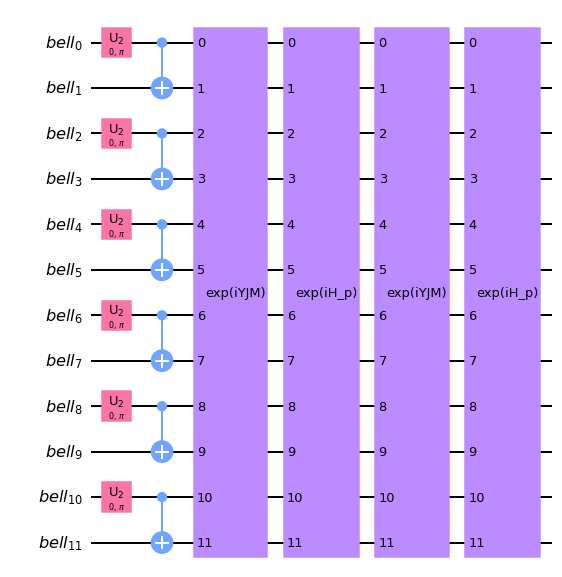

In [2]:
edge_colors = [[[0, 1, 1], [0, 4, 1], [1, 2,1],
               [2, 3, 1], [2,5,1], [4,6,1], [6,8,1], [6,7,1],
              [5,9,1], [8,9,1],[9,10,1], [9,11,1]],
               # J2 terms now for the frustration
               [[1,4,2], [3,5,2], [5,8,2], [7,8,2], [10,11,2], [0,2,2],
               [1,3,2], [2,9,2], [1,5,2], [5,10,2], [5,11,2], [8,10,2],
               [8,11,2], [4,7,2], [0,6,2], [6,9,2], [4,8,2]]]
    # print(edge_colors[0])
    # print(edge_colors[1])
    # lattice = nx.graph()
    # for edgeJ1 in edge_colors[0]:
    #     lattice.add_edge(edgeJ1[0], edgeJ1[1])
num_sites = 12
Heisenberg = getJ1J2_Ham([1.0, 0.5], edge_colors[0], edge_colors[1], num_sites)
# print(Heisenberg)

p = 2 # num of alternating layers
YJMparams = np.random.randn(p, num_sites, num_sites)
Heisparams = np.random.randn(p)
irrep = [6, 6]
Sn_cqa = CQA(num_sites, p, Heisenberg, irrep, YJMparams, Heisparams, debug=False)
Sn_cqa.decompose().draw('mpl')

In [3]:
Sn_cqa_gates = transpile(Sn_cqa, basis_gates=['id', 'rz', 'sx', 'x', 'cx', 'cy', 'cry', 'h', 'ry'])
print('depth of the sn_cqa_gates: {}'.format(Sn_cqa_gates.depth()))

depth of the sn_cqa_gates: 177239


## Plots

In [6]:
J = [1, 0.8]
lattice4 =[[(1,2), (1,8), (2,3), (2,7), (3,4), (3,6), (4,5), (5,6), (5, 12),
            (6,7), (6, 11), (7, 10), (7, 8), (8,9), (9, 10), (10, 11), (11, 12)],

           [(1,3), (1,9), (1,7), (2,4), (2,8), (2, 10), (2, 6), (3, 11), (3,5), (3,7),
            (4, 12), (4, 6), (5, 7), (5, 11), (6, 8), (6, 10), (6, 12),  (7, 9), (7, 11), (8, 10),
            (9, 11), (10, 12)]]
partit = [int(6),int(6)]
Nsites = int( 12)

import matplotlib.pyplot as plt
import pandas as pd 
from sgd import CSnGradient

CsnFourier = CSnGradient(J= J, lattice = lattice4, Nsites=Nsites,
                    partit=partit,p=int(4), num_samples =int(1000), max_iter = int(5001), lr=2e-2)


Ham_rep = CsnFourier.Ham_rep()

# print(CsnFilters.rep_mat_H)
E_gs, V_gs = eigh(Ham_rep.astype('float64'), subset_by_index=[0,1])
V_gs = V_gs[:,0]
E_gs = E_gs[0]
V_gs = jnp.asarray(V_gs)
print('True Ground state Energy via ED for partition {}:--- ({}) '.format(partit, E_gs))
# print('True Ground State wavefuncion in Sn irrep basis for partition {}:--- {}'.format(partit, V_gs))

print('Irrep Dims for {}: --- {}'.format(partit, CsnFourier.dim))


    


/local/conda/miniconda3/envs/autobahnplus/lib/python3.9/site-packages/chex/_src/pytypes.py:37: FutureWarning: jax.tree_structure is deprecated, and will be removed in a future release. Use jax.tree_util.tree_structure instead.
  PyTreeDef = type(jax.tree_structure(None))


True Ground state Energy via ED for partition [6, 6]:--- (-5.728763567980569) 
Irrep Dims for [6, 6]: --- 132


In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

loss1 = pd.read_csv('../data/Kagome_12spin/08-21_15-00/CQA_J0.5_lr0.001_noise0.0_loss.csv')['energy']
loss2 = pd.read_csv('../data/Kagome_12spin/08-22_16-52/CQA_J0.5_lr0.001_noise5e-05_loss.csv')['energy']
loss3 = pd.read_csv('../data/Kagome_12spin/08-22_21-02/CQA_J0.5_lr0.01_noise0.0005_loss.csv')['energy']
# loss4 = pd.read_csv('../data/6_sqaures/08-08_21-47/CQA_J0.5_lr0.002_noise0.0_loss.csv')['energy']
loss4 = pd.read_csv('../data/Kagome_12spin/08-22_22-12/CQA_J0.5_lr0.02_noise0.001_loss.csv')['energy']
iteration = pd.read_csv('../data/6_sqaures/08-09_23-48/CQA_J0.8_lr0.01_noise0.0005_loss.csv')['iteration']

In [30]:
'''
Kagome 
'''
J = [1, 0.5]
lattice3 = [[(1,2), (1,5), (2,3), (3,4), (3,6),
             (5,7), (7, 9), (7,8), (6,10), (9,10), (10,11), (10,12)],
            [(2,5), (4,6), (6,9), (8,9), (11,12), (1,3),
            (2,4), (3,10), (2,6), (6,11), (6,12), (9,11),
            (9, 12), (5, 8), (1,7), (7, 10), (5,9)]]
partit = [int(6),int(6)]
Nsites = int( 12)
from sgd import CSnGradient
from scipy.linalg import eigh, eigvalsh
import jax.numpy as jnp 

CsnFourier = CSnGradient(J= J, lattice = lattice3, Nsites=Nsites,
                    partit=partit,p=int(6), num_samples =int(1000), max_iter = int(5001), lr=1e-3)


Ham_rep = CsnFourier.Ham_rep()

# print(CsnFilters.rep_mat_H)
E_gs, V_gs = eigh(Ham_rep.astype('float64'), subset_by_index=[0,1])
V_gs = V_gs[:,0]
E_gs = E_gs[0]
V_gs = jnp.asarray(V_gs)
print('True Ground state Energy via ED for partition {}:--- ({}) '.format(partit, E_gs))
# print('True Ground State wavefuncion in Sn irrep basis for partition {}:--- {}'.format(partit, V_gs))

print('Irrep Dims for {}: --- {}'.format(partit, CsnFourier.dim))


True Ground state Energy via ED for partition [6, 6]:--- (-4.134292957706443) 
Irrep Dims for [6, 6]: --- 132


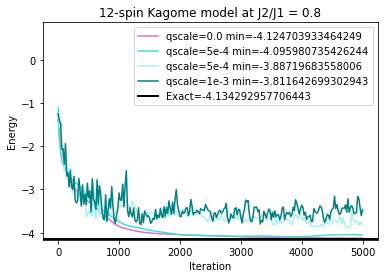

In [31]:
'''
Let's see the loss for loss1 and loss2 
'''
fig, ax1 = plt.subplots()
ax1.plot(iteration, loss1, color='orchid', label='qscale=0.0 min={}'.format(min(loss1)))
ax1.plot(iteration, loss2, color='turquoise', label='qscale=5e-4 min={}'.format(min(loss2)))
ax1.plot(iteration, loss3, color='paleturquoise', label='qscale=5e-4 min={}'.format(min(loss3)))
ax1.plot(iteration, loss4, color='teal', label='qscale=1e-3 min={}'.format(min(loss4)))
ax1.set_ylabel('Energy')
ax1.set_xlabel('Iteration')
ax1.set_ylim([E_gs -0.03,E_gs + 5])
# plt.axis([0,iters_RBM[-1],exact_gs_energy-0.03,exact_gs_energy+0.2])
plt.axhline(y=E_gs, xmin=0,
                 linewidth=2, color='k', label='Exact={}'.format(E_gs))
ax1.legend()
plt.title('12-spin Kagome model at J2/J1 = 0.8')
plt.show()



In [17]:
'''
Heisenberg Hamiltonian 
'''

import qiskit 
import numpy as np 
import matplotlib.pyplot as plt

from typing import Optional, Union, List, Callable, Tuple
from qiskit.circuit import QuantumCircuit, QuantumRegister, parameter
from qiskit import transpile
from qiskit.circuit.library.basis_change import QFT
from qiskit.quantum_info import SparsePauliOp, PauliList, Pauli
from qiskit.opflow import X, Y, Z, I, PauliTrotterEvolution
from qiskit.opflow import PauliOp, PauliSumOp

def transpo2pauli(num_sites: int ,i:int, j:int) -> SparsePauliOp:
        '''
        implement the pauli representation of the transposition (i, j)

        return: SparsePauli 
        '''

        pauli_lst = []
        z0 = np.zeros(num_sites)
        x0 = np.zeros(num_sites)
        x = np.zeros(num_sites)
        z = np.zeros(num_sites)
        x[i] = 1
        x[j] = 1
        z[i] = 1
        z[j] = 1
        pauli_lst.append(Pauli((z0, x)))
        pauli_lst.append(Pauli((z, x0)))
        pauli_lst.append(Pauli((z, x)))
        pauli_lst.append(Pauli((z0, x0)))
        coeff = np.array([2.0, 2.0, 2.0, 0.5])
        transpo_pauli = SparsePauliOp(pauli_lst, coeffs=coeff)
        return transpo_pauli
transpo_pauli_1 = transpo2pauli(6, 1, 3)
transpo_pauli_2 = transpo2pauli(6, 2, 3)
print(np.imag(transpo_pauli_1.coeffs))
print(np.imag(transpo_pauli_2.coeffs))
# print(np.imag(transpo_pauli_1.compose(transpo_pauli_2).coeffs))
a = PauliSumOp(transpo_pauli_2)
# print(SparsePauliOp([transpo_pauli_1, transpo_pauli_2]))

[0. 0. 0. 0.]
[0. 0. 0. 0.]
[ 0.  4. -4.  0. -4.  0.  4.  0.  4. -4.  0.  0.  0.  0.  0.  0.]
